In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [132]:
file_path = '/content/btc.csv'
df = pd.read_csv(file_path)

In [133]:
df.head()

,date,open,high,low,close,volume
0,2017-08-17T00:00:00.000Z,4261.48,4485.39,4200.74,4285.08,795.150377
1,2017-08-18T00:00:00.000Z,4285.08,4371.52,3938.77,4108.37,1199.888264
2,2017-08-19T00:00:00.000Z,4108.37,4184.69,3850.00,4139.98,381.309763
3,2017-08-20T00:00:00.000Z,4120.98,4211.08,4032.62,4086.29,467.083022
4,2017-08-21T00:00:00.000Z,4069.13,4119.62,3911.79,4016.00,691.743060


In [134]:
df.describe()

,open,high,low,close,volume
count,2303.000000,2303.000000,2303.000000,2303.000000,2303.000000
mean,20633.815280,21172.022206,20040.112197,20650.642063,73626.914486
std,15826.221977,16243.504837,15355.349156,15829.596113,85000.014950
min,3188.010000,3276.500000,2817.000000,3189.020000,228.108068
25%,7892.765000,8124.035000,7650.165000,7894.090000,30002.242020
50%,14378.990000,15307.560000,13284.990000,14400.000000,46289.384910
75%,30085.245000,30628.600000,29492.500000,30098.335000,78170.345020
max,67525.820000,69000.000000,66222.400000,67525.830000,760705.362783


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2303 entries, 0 to 2302
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2303 non-null   object 
 1   open    2303 non-null   float64
 2   high    2303 non-null   float64
 3   low     2303 non-null   float64
 4   close   2303 non-null   float64
 5   volume  2303 non-null   float64
dtypes: float64(5), object(1)
memory usage: 108.1+ KB


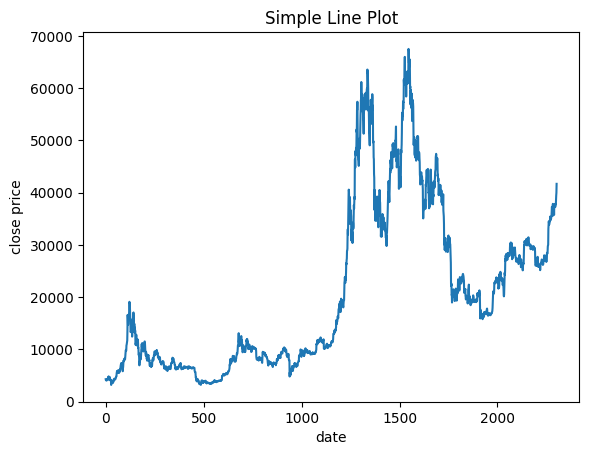

In [136]:
x = np.arange(len(df['close']))
y = df['close']
plt.plot(x,y)

# Add labels and title
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Simple Line Plot')

# Show the plot
plt.show()

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [137]:
cols_name = list(df.columns)
print(cols_name)

['date', 'open', 'high', 'low', 'close', 'volume']


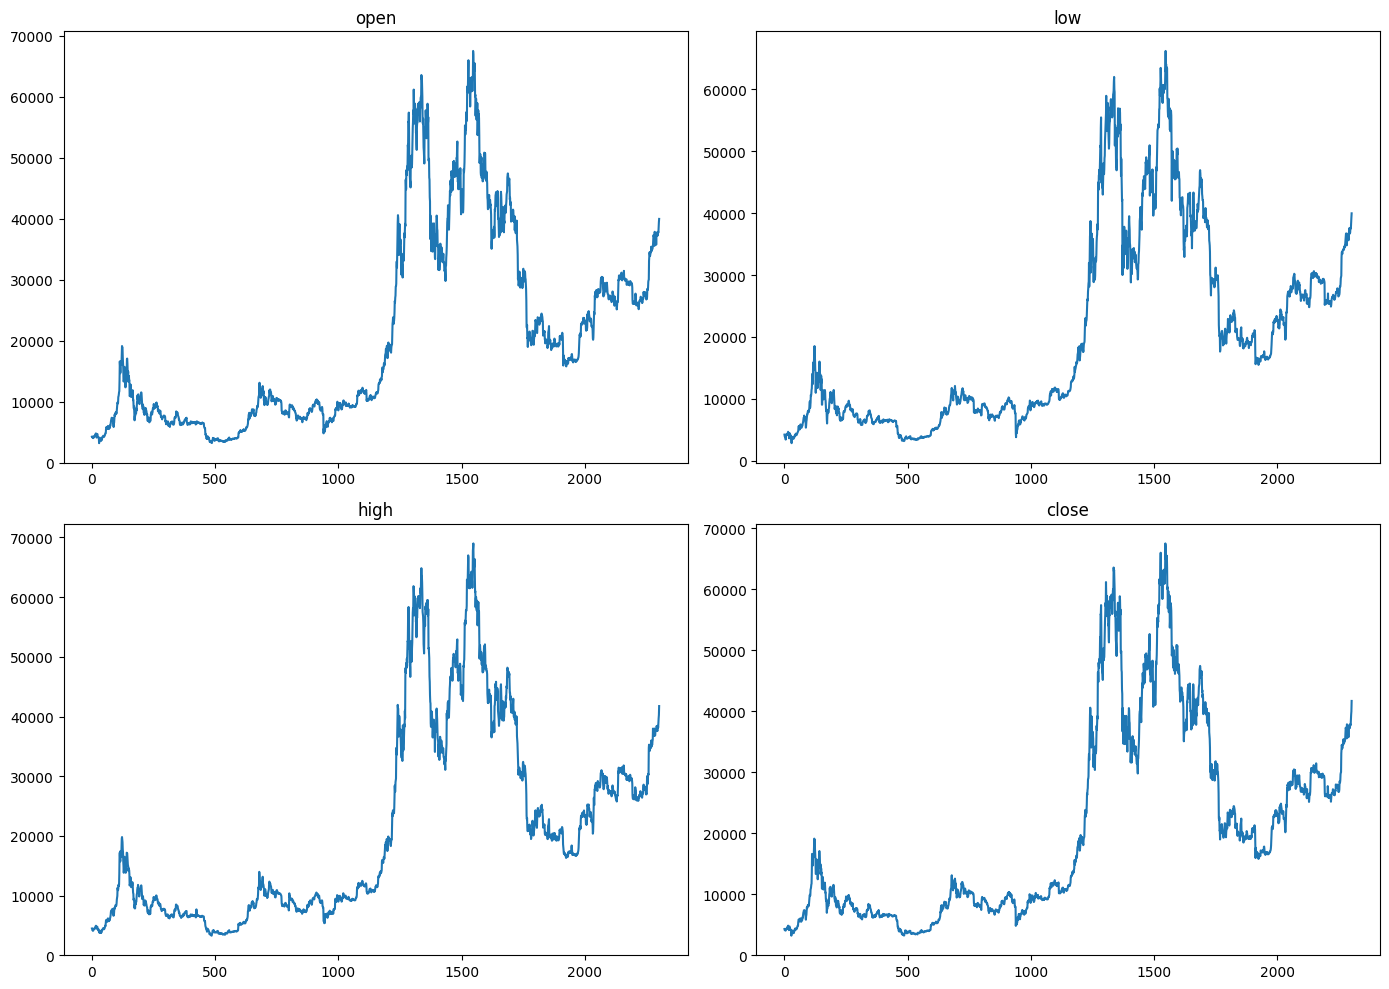

In [138]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
cols_name = list(df.columns)
length = np.arange(len(df['close']))
for i,j in list(itertools.product(np.arange(2), repeat=2)):
  axs[i][j].plot(length, df[cols_name[i+j*2+1]])
  axs[i][j].set_title(cols_name[i+j*2+1])
plt.tight_layout()
plt.show()

It seems like 4 feats have the same graph => to determine number of feats for training we decide to implement pearson correlation

<ipython-input-139-2ecfe224a42f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


<Axes: >

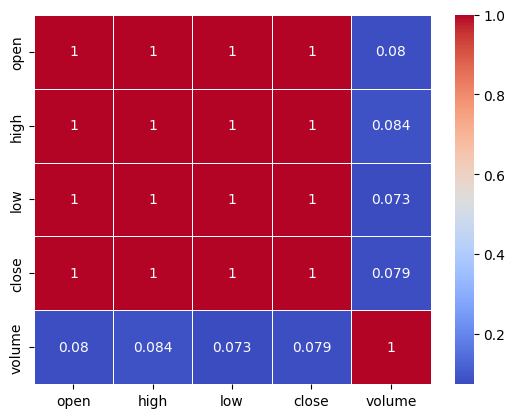

In [139]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

That means we have 2 feats for building predictive model: closing price, volume

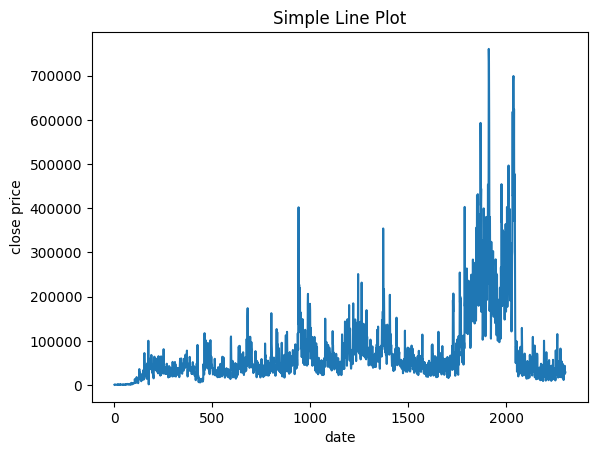

In [140]:
x = np.arange(len(df['volume']))
y = df['volume']
plt.plot(x,y)

# Add labels and title
plt.xlabel('date')
plt.ylabel('close price')
plt.title('Simple Line Plot')

# Show the plot
plt.show()

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time.
In this research we use MA to decide how far model can predict based on noise appearance

In [141]:
ma_day = [10, 20, 30, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  df[column_name] = df['close'].rolling(ma).mean()

In [142]:
df.head(20)

,date,open,high,low,close,volume,MA for 10 days,MA for 20 days,MA for 30 days,MA for 50 days
0,2017-08-17T00:00:00.000Z,4261.48,4485.39,4200.74,4285.08,795.150377,NaN,NaN,NaN,NaN
1,2017-08-18T00:00:00.000Z,4285.08,4371.52,3938.77,4108.37,1199.888264,NaN,NaN,NaN,NaN
2,2017-08-19T00:00:00.000Z,4108.37,4184.69,3850.00,4139.98,381.309763,NaN,NaN,NaN,NaN
3,2017-08-20T00:00:00.000Z,4120.98,4211.08,4032.62,4086.29,467.083022,NaN,NaN,NaN,NaN
4,2017-08-21T00:00:00.000Z,4069.13,4119.62,3911.79,4016.00,691.743060,NaN,NaN,NaN,NaN
5,2017-08-22T00:00:00.000Z,4016.00,4104.82,3400.00,4040.00,966.684858,NaN,NaN,NaN,NaN
6,2017-08-23T00:00:00.000Z,4040.00,4265.80,4013.89,4114.01,1001.136565,NaN,NaN,NaN,NaN
7,2017-08-24T00:00:00.000Z,4147.00,4371.68,4085.01,4316.01,787.418753,NaN,NaN,NaN,NaN
8,2017-08-25T00:00:00.000Z,4316.01,4453.91,4247.48,4280.68,573.612740,NaN,NaN,NaN,NaN
9,2017-08-26T00:00:00.000Z,4280.71,4367.00,4212.41,4337.44,228.108068,4172.386,NaN,NaN,NaN


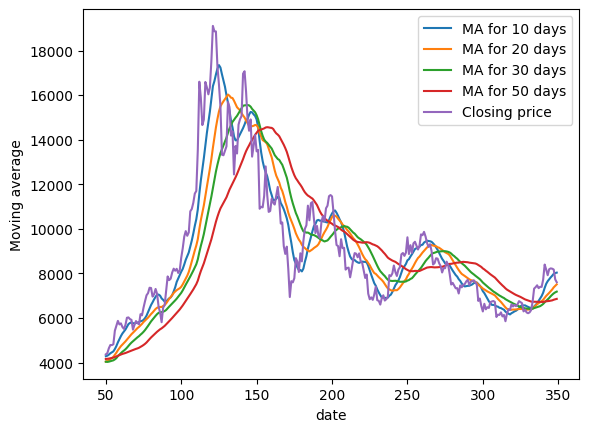

In [143]:
ma_day = [10, 20, 30, 50]

for ma in ma_day:
  column_name = f"MA for {ma} days"
  plt.plot(length[50:350], df[column_name][50:350], label=column_name)

plt.plot(length[50:350], df['close'][50:350], label='Closing price')
plt.xlabel('date')
plt.ylabel('Moving average')
plt.legend()
plt.show()

Acording to the graph => 20 days is acceptable for model to predict market rule

Next, we're going to calculate percentage change of the coin. This will helps recognize the stability of the coin

In [144]:
df['daily percentage change'] = df['close'].pct_change()

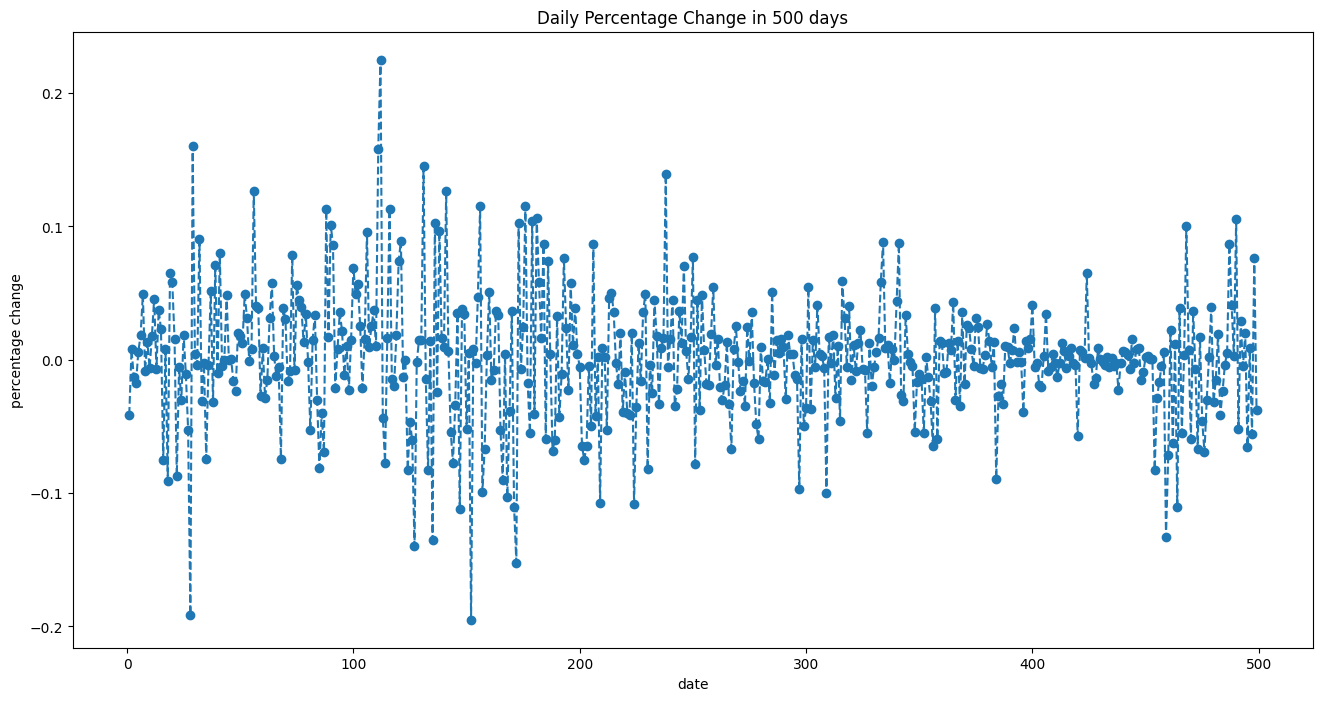

In [145]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# df['daily percentage change'].plot(linestyle='--', marker='o')

# Create a figure with a specific width and height
plt.figure(figsize=(16, 8))  # Adjust the values (width, height) as needed

# Plot the data
plt.plot(df['daily percentage change'][:500], linestyle='--', marker='o')

# Add labels and title if needed
plt.xlabel('date')
plt.ylabel('percentage change')
plt.title('Daily Percentage Change in 500 days')

# Show the plot
plt.show()


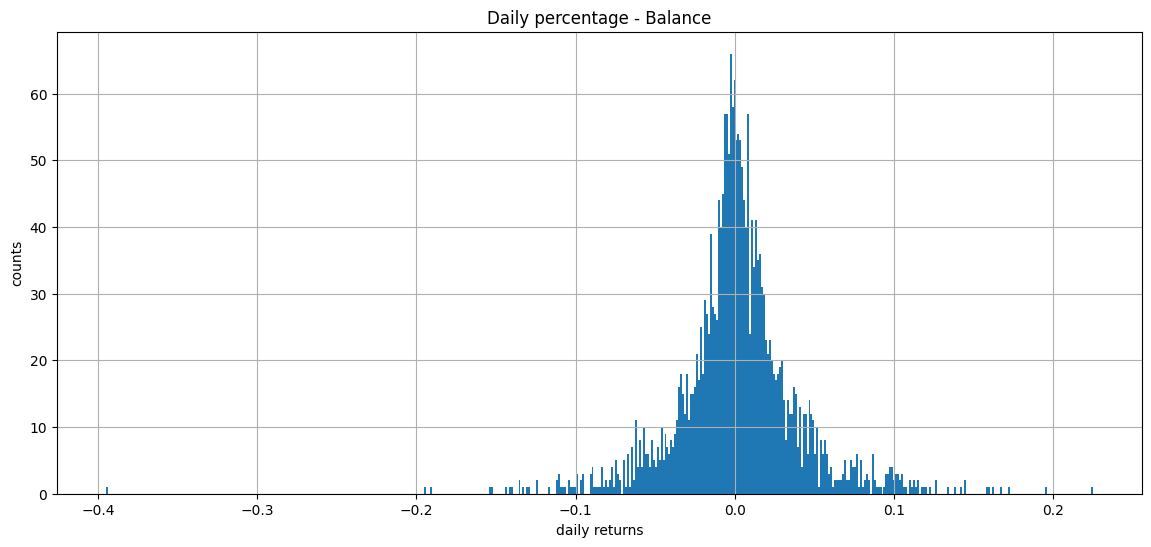

In [146]:
plt.figure(figsize=(14, 6))
df['daily percentage change'].hist(bins=500)
plt.title('Daily percentage - Balance')
plt.ylabel('counts')
plt.xlabel('daily returns')
plt.show()

It looks like stable coin that follows market rule and no external manipulation appears on this dataset. => predictable

# Model implement

In [147]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [155]:
data = df.filter(['close'])
dataset = data.values
training_len = int(len(dataset) * .9)
past_day = 20

In [156]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(dataset)

In [157]:
x_train = []
y_train = []

for i in range(past_day, training_len):
    x_train.append(dataset[i-past_day:i])
    y_train.append(dataset[i])
    # if i<= 21:
    #     print(x_train)
    #     print(y_train)
    #     print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape
print(x_train.shape, y_train.shape)

(2052, 20, 1)
(2052, 20, 1) (2052, 1)


In [161]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(256, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(40))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=10, epochs=10)

Epoch 1/10
206/206 [==============================] - 24s 85ms/step - loss: 0.0048
Epoch 2/10
206/206 [==============================] - 17s 85ms/step - loss: 0.0015
Epoch 3/10
206/206 [==============================] - 23s 111ms/step - loss: 0.0014
Epoch 4/10
206/206 [==============================] - 17s 84ms/step - loss: 7.3644e-04
Epoch 5/10
206/206 [==============================] - 17s 84ms/step - loss: 7.0193e-04
Epoch 6/10
206/206 [==============================] - 19s 94ms/step - loss: 5.6942e-04
Epoch 7/10
206/206 [==============================] - 17s 84ms/step - loss: 5.5870e-04
Epoch 8/10
206/206 [==============================] - 17s 84ms/step - loss: 5.0497e-04
Epoch 9/10
206/206 [==============================] - 19s 92ms/step - loss: 4.7901e-04
Epoch 10/10
206/206 [==============================] - 17s 84ms/step - loss: 4.6476e-04


In [165]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = dataset[training_len - past_day:]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_len:]
for i in range(past_day, len(test_data)):
    x_test.append(test_data[i-past_day:i])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("Accuracy:", 1 - rmse/np.max(x_test))

8/8 [==============================] - 1s 76ms/step
Accuracy: 0.9794976327489234


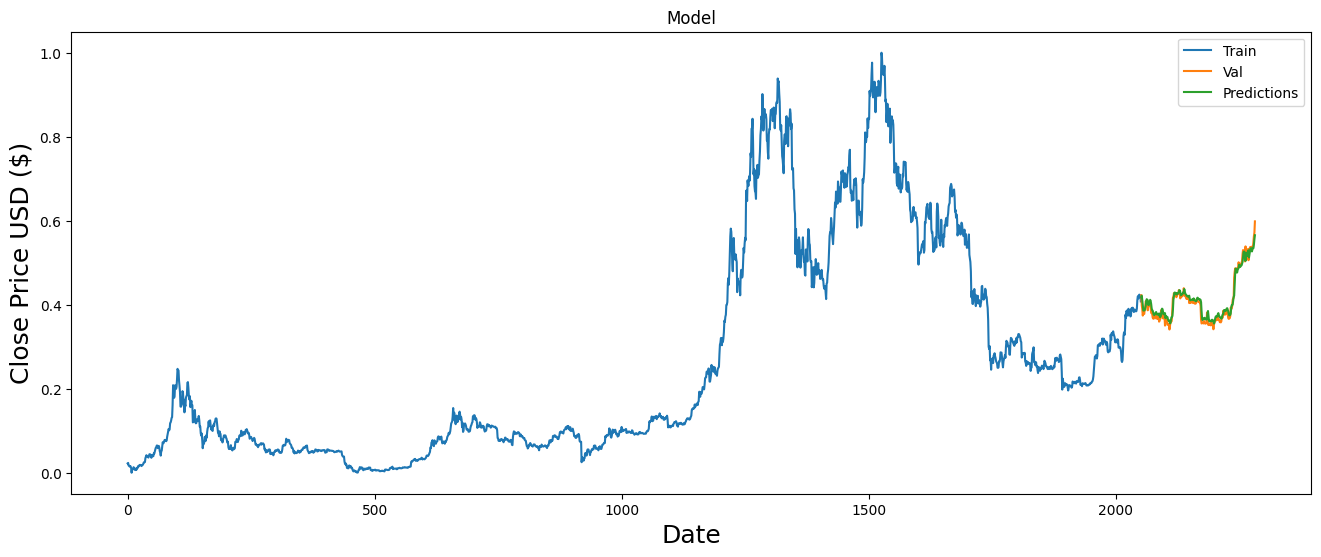

In [166]:
train = y_train
valid = y_test
# valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(np.arange(len(train)), train)
plt.plot(np.arange(len(train) ,len(train) + len(valid)), valid)
plt.plot(np.arange(len(train), len(train) + len(predictions)), predictions)
plt.legend(['Train', 'Val', 'Predictions'])
plt.show()